<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/InceptionP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/PhilJd/freiburg_groceries_dataset.git

Cloning into 'freiburg_groceries_dataset'...
remote: Enumerating objects: 123, done.
remote: Total 123 (delta 0), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (123/123), 6.54 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
cd freiburg_groceries_dataset/src

/content/freiburg_groceries_dataset/src


In [3]:
!python download_dataset.py

Extracting dataset.
Done.


In [4]:
!rm -r /content/freiburg_groceries_dataset

In [5]:
import shutil

# Diretórios a serem apagados
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Função para apagar diretórios
def apagar_diretorio(diretorio):
    try:
        shutil.rmtree(diretorio)
        print(f'Diretório {diretorio} apagado com sucesso.')
    except Exception as e:
        print(f"Erro ao apagar {diretorio}: {e}")

# Apague os diretórios
apagar_diretorio(diretorio_treinamento)
apagar_diretorio(diretorio_teste)
apagar_diretorio(diretorio_validacao)

Erro ao apagar /content/train: [Errno 2] No such file or directory: '/content/train'
Erro ao apagar /content/test: [Errno 2] No such file or directory: '/content/test'
Erro ao apagar /content/val: [Errno 2] No such file or directory: '/content/val'


In [6]:
import os
import random
import shutil

# Diretório de origem
diretorio_origem = '/content/produtos'

# Diretórios de destino
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Proporções de imagens para treinamento (60%), teste (20%) e validação (20%)
proporcao_treinamento = 0.6
proporcao_teste = 0.2
proporcao_validacao = 0.2

# Lista de subdiretórios no diretório de origem
subdiretorios = os.listdir(diretorio_origem)

# Crie os 25 diretórios em train, test e val
for subdir in subdiretorios:
    diretorio_treinamento_sub = os.path.join(diretorio_treinamento, subdir)
    diretorio_teste_sub = os.path.join(diretorio_teste, subdir)
    diretorio_validacao_sub = os.path.join(diretorio_validacao, subdir)

    os.makedirs(diretorio_treinamento_sub, exist_ok=True)
    os.makedirs(diretorio_teste_sub, exist_ok=True)
    os.makedirs(diretorio_validacao_sub, exist_ok=True)

# Função para copiar arquivos de um diretório para outro, mantendo a mesma estrutura de pastas
def copiar_com_estrutura(origem, destino, proporcao):
    arquivos = os.listdir(origem)
    random.shuffle(arquivos)
    num_arquivos = len(arquivos)
    num_destino = int(num_arquivos * proporcao)

    for arquivo in arquivos[:num_destino]:
        caminho_arquivo_origem = os.path.join(origem, arquivo)
        caminho_arquivo_destino = os.path.join(destino, arquivo)
        if os.path.isdir(caminho_arquivo_origem):
            os.makedirs(caminho_arquivo_destino, exist_ok=True)
            copiar_com_estrutura(caminho_arquivo_origem, caminho_arquivo_destino, proporcao)
        else:
            shutil.copy2(caminho_arquivo_origem, caminho_arquivo_destino)

# Distribua os arquivos com a mesma estrutura de pastas
for subdir in subdiretorios:
    diretorio_origem_sub = os.path.join(diretorio_origem, subdir)
    diretorio_treinamento_sub = os.path.join(diretorio_treinamento, subdir)
    diretorio_teste_sub = os.path.join(diretorio_teste, subdir)
    diretorio_validacao_sub = os.path.join(diretorio_validacao, subdir)

    copiar_com_estrutura(diretorio_origem_sub, diretorio_treinamento_sub, proporcao_treinamento)
    copiar_com_estrutura(diretorio_origem_sub, diretorio_teste_sub, proporcao_teste)
    copiar_com_estrutura(diretorio_origem_sub, diretorio_validacao_sub, proporcao_validacao)

print(f'Imagens copiadas com a mesma estrutura de pastas para treinamento, teste e validação.')


Imagens copiadas com a mesma estrutura de pastas para treinamento, teste e validação.


In [7]:
import os
import shutil
import random

# Diretórios de origem e destino
diretorio_base = '/content/produtos'
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Proporção de imagens para treinamento, teste e validação
proporcao_treinamento = 0.6
proporcao_teste = 0.2
proporcao_validacao = 0.2

# Função para dividir imagens aleatoriamente
def dividir_imagens(diretorio_origem, diretorio_destino, proporcao):
    arquivos = os.listdir(diretorio_origem)
    random.shuffle(arquivos)  # Embaralhar a ordem dos arquivos
    total_imagens = len(arquivos)

    # Calcular o número de imagens a serem copiadas
    num_imagens = int(total_imagens * proporcao)

    # Copiar as imagens
    for arquivo in arquivos[:num_imagens]:
        caminho_arquivo_origem = os.path.join(diretorio_origem, arquivo)
        caminho_arquivo_destino = os.path.join(diretorio_destino, arquivo)
        shutil.copy2(caminho_arquivo_origem, caminho_arquivo_destino)

# Criar diretórios de treinamento, teste e validação
os.makedirs(diretorio_treinamento, exist_ok=True)
os.makedirs(diretorio_teste, exist_ok=True)
os.makedirs(diretorio_validacao, exist_ok=True)

# Para cada subdiretório
for subdiretorio in os.listdir(diretorio_base):
    diretorio_origem = os.path.join(diretorio_base, subdiretorio)
    diretorio_treinamento_destino = os.path.join(diretorio_treinamento, subdiretorio)
    diretorio_teste_destino = os.path.join(diretorio_teste, subdiretorio)
    diretorio_validacao_destino = os.path.join(diretorio_validacao, subdiretorio)

    # Dividir as imagens aleatoriamente
    dividir_imagens(diretorio_origem, diretorio_treinamento_destino, proporcao_treinamento)
    dividir_imagens(diretorio_origem, diretorio_teste_destino, proporcao_teste)
    dividir_imagens(diretorio_origem, diretorio_validacao_destino, proporcao_validacao)

print('Imagens divididas aleatoriamente em treinamento, teste e validação.')


Imagens divididas aleatoriamente em treinamento, teste e validação.


In [8]:
import os
import shutil
import hashlib

# Diretórios de treinamento, teste e validação
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Função para calcular o hash de um arquivo
def calcular_hash(arquivo):
    if os.path.isfile(arquivo):  # Verifique se é um arquivo
        sha1 = hashlib.sha1()
        with open(arquivo, "rb") as f:
            while True:
                bloco = f.read(65536)
                if not bloco:
                    break
                sha1.update(bloco)
        return sha1.hexdigest()
    return None

# Função para verificar duplicatas
def verificar_duplicatas(diretorio1, diretorio2):
    duplicatas = []
    for arquivo1 in os.listdir(diretorio1):
        caminho_arquivo1 = os.path.join(diretorio1, arquivo1)
        hash_arquivo1 = calcular_hash(caminho_arquivo1)
        if hash_arquivo1 is None:
            continue  # Ignorar diretórios

        for arquivo2 in os.listdir(diretorio2):
            caminho_arquivo2 = os.path.join(diretorio2, arquivo2)
            hash_arquivo2 = calcular_hash(caminho_arquivo2)
            if hash_arquivo2 is None:
                continue  # Ignorar diretórios

            if hash_arquivo1 == hash_arquivo2:
                duplicatas.append((arquivo1, arquivo2))

    return duplicatas

# Verificar duplicatas entre treinamento e teste
duplicatas_treinamento_teste = verificar_duplicatas(diretorio_treinamento, diretorio_teste)
if duplicatas_treinamento_teste:
    print("Duplicatas entre treinamento e teste:")
    for duplicata in duplicatas_treinamento_teste:
        print(f"{duplicata[0]} em treinamento e {duplicata[1]} em teste")
else:
    print("Nenhuma duplicata encontrada entre treinamento e teste.")

# Verificar duplicatas entre treinamento e validação
duplicatas_treinamento_validacao = verificar_duplicatas(diretorio_treinamento, diretorio_validacao)
if duplicatas_treinamento_validacao:
    print("Duplicatas entre treinamento e validação:")
    for duplicata in duplicatas_treinamento_validacao:
        print(f"{duplicata[0]} em treinamento e {duplicata[1]} em validação")
else:
    print("Nenhuma duplicata encontrada entre treinamento e validação.")

# Verificar duplicatas entre teste e validação
duplicatas_teste_validacao = verificar_duplicatas(diretorio_teste, diretorio_validacao)
if duplicatas_teste_validacao:
    print("Duplicatas entre teste e validação:")
    for duplicata in duplicatas_teste_validacao:
        print(f"{duplicata[0]} em teste e {duplicata[1]} em validação")
else:
    print("Nenhuma duplicata encontrada entre teste e validação.")


Nenhuma duplicata encontrada entre treinamento e teste.
Nenhuma duplicata encontrada entre treinamento e validação.
Nenhuma duplicata encontrada entre teste e validação.


In [9]:
import os
import imgaug as ia
from imgaug import augmenters as iaa
import shutil
import cv2

# Diretórios
diretorio_origem = '/content/produtos'
diretorio_treinamento = '/content/train'
diretorio_teste = '/content/test'
diretorio_validacao = '/content/val'

# Lista de subdiretórios
subdiretorios = os.listdir(diretorio_origem)

# Augmenter para aumento de dados
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # Espelhar horizontalmente com 50% de probabilidade
    iaa.GaussianBlur(sigma=(0, 3.0)),  # Aplicar desfoque gaussiano
    iaa.Affine(rotate=(-25, 25)),  # Rotacionar a imagem
])

# Função para aplicar aumento de dados e copiar imagens
def aplicar_aumento_e_copiar(diretorio_origem, diretorio_destino, proporcao=0.2):
    arquivos = os.listdir(diretorio_origem)

    for arquivo in arquivos:
        caminho_arquivo_origem = os.path.join(diretorio_origem, arquivo)
        # Use OpenCV to read the image
        imagem = cv2.imread(caminho_arquivo_origem)

        num_aumentos = int(proporcao)
        for i in range(num_aumentos):
            imagem_aumentada = augmenter.augment_image(imagem)
            nome_arquivo = f'aumento_{i}_{arquivo}'
            caminho_arquivo_destino = os.path.join(diretorio_destino, nome_arquivo)
            # Use OpenCV to save the image
            cv2.imwrite(caminho_arquivo_destino, imagem_aumentada)

# Aplicar aumento de dados e copiar imagens para cada subdiretório
for subdiretorio in subdiretorios:
    diretorio_origem_completo = os.path.join(diretorio_origem, subdiretorio)
    diretorio_treinamento_completo = os.path.join(diretorio_treinamento, subdiretorio)
    diretorio_teste_completo = os.path.join(diretorio_teste, subdiretorio)
    diretorio_validacao_completo = os.path.join(diretorio_validacao, subdiretorio)

    # Aplicar aumento de dados e copiar imagens para cada diretório
    aplicar_aumento_e_copiar(diretorio_origem_completo, diretorio_treinamento_completo)
    aplicar_aumento_e_copiar(diretorio_origem_completo, diretorio_teste_completo)
    aplicar_aumento_e_copiar(diretorio_origem_completo, diretorio_validacao_completo)

print('Aumento de dados aplicado com sucesso.')

Aumento de dados aplicado com sucesso.


In [1]:
import os

# Função para calcular o total de imagens em um diretório
def contar_imagens_em_diretorio(diretorio):
    total_imagens = 0
    for raiz, _, arquivos in os.walk(diretorio):
        for arquivo in arquivos:
            if arquivo.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                total_imagens += 1
    return total_imagens

# Diretórios a serem verificados
diretorio_produtos = '/content/produtos'  # Diretório original sem aumento
diretorio_val = '/content/val'
diretorio_train = '/content/train'
diretorio_test = '/content/test'

# Calcular o total de imagens no diretório original (antes do aumento)
total_imagens_produtos = contar_imagens_em_diretorio(diretorio_produtos)

# Aplicar o aumento de dados nos diretórios de treinamento, teste e validação

# Calcular o total de imagens após o aumento
total_imagens_val = contar_imagens_em_diretorio(diretorio_val)
total_imagens_train = contar_imagens_em_diretorio(diretorio_train)
total_imagens_test = contar_imagens_em_diretorio(diretorio_test)

# Exibir os totais
print(f'Total de imagens em {diretorio_produtos} (antes do aumento): {total_imagens_produtos}')
print(f'Total de imagens em {diretorio_val} (após o aumento): {total_imagens_val}')
print(f'Total de imagens em {diretorio_train} (após o aumento): {total_imagens_train}')
print(f'Total de imagens em {diretorio_test} (após o aumento): {total_imagens_test}')

Total de imagens em /content/produtos (antes do aumento): 4947
Total de imagens em /content/val (após o aumento): 1776
Total de imagens em /content/train (após o aumento): 4155
Total de imagens em /content/test (após o aumento): 1767


In [ ]:
#Normal
import os
import numpy as np
from PIL import Image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Especifique os caminhos para os diretórios que contêm as imagens de treinamento, validação e teste
diretorio_treinamento = '/content/train'
diretorio_validacao = '/content/val'
diretorio_teste = '/content/test'

# Função para carregar imagens de um diretório específico
def carregar_imagens(diretorio):
    imagens = []
    rotulos = []

    for classe in os.listdir(diretorio):
        classe_dir = os.path.join(diretorio, classe)
        for imagem_nome in os.listdir(classe_dir):
            caminho_imagem = os.path.join(classe_dir, imagem_nome)

            img = Image.open(caminho_imagem)
            img = img.resize((299, 299))
            img = np.array(img)
            img = preprocess_input(img)

            imagens.append(img)
            rotulos.append(classe)

    return np.array(imagens), np.array(rotulos)

# Crie geradores de dados para treinamento, validação e teste
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = datagen_train.flow_from_directory(
    directory=diretorio_treinamento,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

datagen_validation = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = datagen_validation.flow_from_directory(
    directory=diretorio_validacao,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# Carregue o modelo InceptionV3 pré-treinado com pesos do ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Ajuste fino das camadas do modelo InceptionV3
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[249:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

# Aumente o número de épocas de treinamento para obter um melhor ajuste
model.fit(train_generator, epochs=1, validation_data=validation_generator, callbacks=[early_stopping, model_checkpoint])

# Avalie o modelo no conjunto de teste
teste_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = teste_datagen.flow_from_directory(
    directory=diretorio_teste,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

accuracy = model.evaluate(test_generator)[1]
print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')


In [2]:
#ajuste fino
import os
import numpy as np
from PIL import Image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Especifique os caminhos para os diretórios que contêm as imagens de treinamento, validação e teste
diretorio_treinamento = '/content/train'
diretorio_validacao = '/content/val'
diretorio_teste = '/content/test'

# Função para carregar imagens de um diretório específico
def carregar_imagens(diretorio):
    imagens = []
    rotulos = []

    for classe in os.listdir(diretorio):
        classe_dir = os.path.join(diretorio, classe)
        for imagem_nome in os.listdir(classe_dir):
            caminho_imagem = os.path.join(classe_dir, imagem_nome)

            img = Image.open(caminho_imagem)
            img = img.resize((299, 299))
            img = np.array(img)
            img = preprocess_input(img)

            imagens.append(img)
            rotulos.append(classe)

    return np.array(imagens), np.array(rotulos)

# Crie geradores de dados para treinamento, validação e teste
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = datagen_train.flow_from_directory(
    directory=diretorio_treinamento,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

datagen_validation = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = datagen_validation.flow_from_directory(
    directory=diretorio_validacao,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# Carregue o modelo InceptionV3 pré-treinado com pesos do ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Ajuste fino das camadas do modelo InceptionV3
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[249:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

# Aumente o número de épocas de treinamento para obter um melhor ajuste
model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping, model_checkpoint])

# Avalie o modelo no conjunto de teste
teste_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = teste_datagen.flow_from_directory(
    directory=diretorio_teste,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

accuracy = model.evaluate(test_generator)[1]
print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')

Found 4155 images belonging to 25 classes.
Found 1776 images belonging to 25 classes.
Epoch 1/10
130/130 [==============================] - ETA: 0s - loss: 1.7298 - accuracy: 0.5035 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - 1768s 14s/step - loss: 1.7298 - accuracy: 0.5035 - val_loss: 0.8021 - val_accuracy: 0.7590
Epoch 2/10
130/130 [==============================] - 1778s 14s/step - loss: 0.6603 - accuracy: 0.8101 - val_loss: 0.3042 - val_accuracy: 0.9093
Epoch 3/10
130/130 [==============================] - 1795s 14s/step - loss: 0.3357 - accuracy: 0.9023 - val_loss: 0.1884 - val_accuracy: 0.9459
Epoch 4/10
130/130 [==============================] - 1796s 14s/step - loss: 0.1783 - accuracy: 0.9528 - val_loss: 0.1293 - val_accuracy: 0.9611
Epoch 5/10
130/130 [==============================] - 1763s 14s/step - loss: 0.1223 - accuracy: 0.9661 - val_loss: 0.1111 - val_accuracy: 0.9668
Epoch 6/10
130/130 [==============================] - 1785s 14s/step - loss: 0.0988 - accuracy: 0.9711 - val_loss: 0.1046 - val_accuracy: 0.9713
Epoch 7/10
130/130 [==============================] - 1691s 13s/step - loss: 0.0612 - accuracy: 0.9836 - val_loss: 0.0665 - val_accuracy: 0.9

1/1 [==============================] - 2s 2s/step


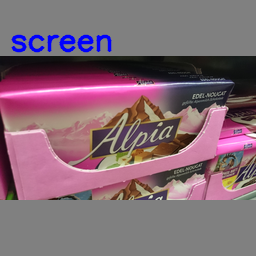

In [22]:
#vgg19
#!pip install gTTS
import cv2
import numpy as np
from keras.applications.vgg19 import preprocess_input, VGG19, decode_predictions
from google.colab.patches import cv2_imshow
from gtts import gTTS
import IPython.display as ipd

# Caminho para a imagem de teste
caminho_imagem_teste = '/content/val/CHOCOLATE/CHOCOLATE0005.png'  # Substitua pelo caminho da sua imagem de teste

# Ler a imagem de teste
image = cv2.imread(caminho_imagem_teste)

# Redimensionar a imagem para o tamanho esperado pela VGG19
image_resized = cv2.resize(image, (224, 224))

# Adicionar a dimensão do lote (batch)
image_resized = np.expand_dims(image_resized, axis=0)

# Pré-processamento específico da VGG19
image_preprocessed = preprocess_input(image_resized)

# Carregar o modelo VGG19 pré-treinado
model = VGG19(weights='imagenet')

# Fazer a previsão usando o modelo treinado
predicted_label = model.predict(image_preprocessed)

# Descodificar o rótulo previsto para obter a classe
predicted_class = decode_predictions(predicted_label, top=1)[0][0][1]

# Exibir a imagem com a previsão
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, f'{predicted_class}', (10, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
cv2_imshow(image)

# Gerar o arquivo de áudio com o nome do produto previsto
tts = gTTS(text=f'O produto é {predicted_class}', lang='pt')
tts.save('/content/prevision.mp3')

# Reproduzir o arquivo de áudio
ipd.Audio('/content/prevision.mp3')

1/1 [==============================] - 2s 2s/step


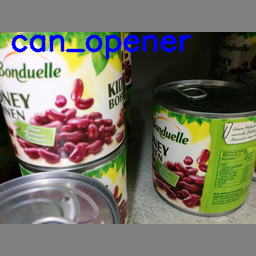

In [24]:
!pip install gTTS
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import cv2
import numpy as np
from keras.applications.inception_v3 import decode_predictions  # Importe a função de decodificação correta
from google.colab.patches import cv2_imshow
from gtts import gTTS
import IPython.display as ipd

# Caminho para a imagem de teste
caminho_imagem_teste = '/content/test/BEANS/BEANS0008.png'  # Substitua pelo caminho da sua imagem de teste

# Ler a imagem de teste
image = cv2.imread(caminho_imagem_teste)

# Redimensionar a imagem para o tamanho esperado pela InceptionV3 (299x299)
image_resized = cv2.resize(image, (299, 299))  # Use o tamanho correto para InceptionV3

# Adicionar a dimensão do lote (batch)
image_resized = np.expand_dims(image_resized, axis=0)

# Pré-processamento específico da InceptionV3
image_preprocessed = preprocess_input(image_resized)

# Carregar o modelo InceptionV3 pré-treinado
model = InceptionV3(weights='imagenet')  # Use o modelo InceptionV3

# Fazer a previsão usando o modelo treinado
predicted_label = model.predict(image_preprocessed)

# Descodificar o rótulo previsto para obter a classe
predicted_class = decode_predictions(predicted_label, top=1)[0][0][1]

# Exibir a imagem com a previsão
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, f'{predicted_class}', (10, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
cv2_imshow(image)

# Gerar o arquivo de áudio com o nome do produto previsto
tts = gTTS(text=f'O produto é {predicted_class}', lang='pt')
tts.save('/content/prevision.mp3')

# Reproduzir o arquivo de áudio
ipd.Audio('/content/prevision.mp3')


In [25]:
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model

# Especifique os caminhos para os diretórios que contêm as imagens de teste
diretorio_teste = '/content/test'

# Carregue o modelo treinado
modelo = load_model('/content/best_model.h5')  # Substitua 'best_model.h5' pelo caminho correto para o seu modelo treinado

# Função para carregar imagens de um diretório específico
def carregar_imagens(diretorio):
    imagens = []
    rotulos = []

    for classe in os.listdir(diretorio):
        classe_dir = os.path.join(diretorio, classe)
        for imagem_nome in os.listdir(classe_dir):
            caminho_imagem = os.path.join(classe_dir, imagem_nome)

            img = Image.open(caminho_imagem)
            img = img.resize((299, 299))
            img = img_to_array(img)
            img = preprocess_input(img)

            imagens.append(img)
            rotulos.append(classe)

    return np.array(imagens), np.array(rotulos)

# Carregue as imagens de teste e rótulos
imagens_teste, rotulos_teste = carregar_imagens(diretorio_teste)

# Faça previsões com o modelo
previsoes = modelo.predict(imagens_teste)

# Analise as previsões e identifique as imagens incorretas
imagens_incorretas = []
rotulos_incorretos = []

for i in range(len(rotulos_teste)):
    classe_real = rotulos_teste[i]
    classe_predita = np.argmax(previsoes[i])

    if classe_real != classe_predita:
        imagens_incorretas.append(imagens_teste[i])
        rotulos_incorretos.append((classe_real, classe_predita))

# Exiba as imagens incorretas e as previsões incorretas
for i in range(len(imagens_incorretas)):
    imagem = imagens_incorretas[i]
    classe_real, classe_predita = rotulos_incorretos[i]
    print(f'Classe Real: {classe_real}, Classe Predita: {classe_predita}')
    # Aqui você pode exibir a imagem ou salvar em um diretório para análise posterior

# Calcule a taxa de erro
taxa_erro = len(imagens_incorretas) / len(rotulos_teste) * 100
print(f'Taxa de Erro: {taxa_erro:.2f}%')

56/56 [==============================] - 415s 7s/step
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Real: CEREAL, Classe Predita: 3
Classe Rea

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model

# Especifique os caminhos para os diretórios que contêm as imagens de teste
diretorio_teste = '/content/test'

# Carregue o modelo treinado
modelo = load_model('best_model.h5')  # Substitua 'best_model.h5' pelo caminho correto para o seu modelo treinado

# Função para carregar imagens de um diretório específico
def carregar_imagens(diretorio):
    imagens = []
    rotulos = []

    for classe in os.listdir(diretorio):
        classe_dir = os.path.join(diretorio, classe)
        for imagem_nome in os.listdir(classe_dir):
            caminho_imagem = os.path.join(classe_dir, imagem_nome)

            img = Image.open(caminho_imagem)
            img = img.resize((299, 299))
            img = img_to_array(img)
            img = preprocess_input(img)

            imagens.append(img)
            rotulos.append(classe)

    return np.array(imagens), np.array(rotulos)

# Carregue as imagens de teste e rótulos
imagens_teste, rotulos_teste = carregar_imagens(diretorio_teste)

# Faça previsões com o modelo
previsoes = modelo.predict(imagens_teste)

# Crie um DataFrame com informações sobre as imagens e previsões
data = {
    'Imagem': [os.path.basename(imagem) for imagem in os.listdir(diretorio_teste)],
    'Classe Real': rotulos_teste,
    'Classe Predita': [np.argmax(previsao) for previsao in previsoes]
}

df = pd.DataFrame(data)

# Exiba o DataFrame
print(df)